# Fundamentals of Data Analysis Weekly Tasks

### **Neil Anglim**
***

## Task 1

### Collatz
> The Collatz conjecture is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . . 


> For example, starting with the value 10, which is an even number, we divide it by 2 to get 5. Then 5 is an odd number so, we multiply by 3 and add 1 to get 16. Then we repeatedly divide by 2 to get 8, 4, 2, 1. Once we are at 1, we go back to 4 and get stuck in the repeating sequence 4, 2, 1 as we suspected. Your task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

#### The below code is copied from Ian's Tutorial and will be used for inspiration in the following code

In [1]:
#defining the function
def f(x):
    if (x % 2 == 0):#if the number is even
        return x // 2
    elif (x % 2 == 1):
        return (x * 3) + 1   #if the number is odd
    else:
        print ("Something went wrong in collatz")
        return None

In [2]:
def collatz(x):
    print(f'Testing Collatz with the inital value {x}')
    while x != 1:
        print(x, end=', ')
        x = f(x)
    print(x)


In [3]:
collatz(10000)

Testing Collatz with the inital value 10000
10000, 5000, 2500, 1250, 625, 1876, 938, 469, 1408, 704, 352, 176, 88, 44, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1


### Below I use a slightly different method for the task execution

In [4]:
def collatz_sequence(n): #define a function to generate collatz for a given number n
    sequence = [n] #initialise a list with starting number n
    while n != 1:
        if n % 2 == 0: #check if in is even
            n = n // 2 #divide by 2
        else:
            n = (3 * n) + 1 #if it is odd, multiply by 3 and add 1
        sequence.append(n) # Append the new value of n to the sequence
    return sequence

In [5]:
def verify_collatz(limit): #define a function to verify collatz up to a limit
    for i in range(1, limit + 1): #cleverly remember that the limit will need to include this +1, thanks to zero indexing
        sequence = collatz_sequence(i) #calling in the previous function
        if sequence[-1] != 1: #if the last element of the sequence is not 1, then the conjecture is proven false
            return False
    return True

result = verify_collatz(10000) #call the function to verify for the limit of 10,0000
if result:
    print("Collatz conjecture is true for the first 10,000 positive integers.")
else:
    print("Collatz conjecture does not work for the first 10,000 positive integers")

Collatz conjecture is true for the first 10,000 positive integers.


## Task 2

### Penguins

> Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables that should be used to model them in Python, explaining your rationale.

> <https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv>

This dataset contains information about different species of penguin, and compares their different characteristics using a medium sample size. The main variables used in the dataset are as follows:
1. **Species**: The first column of the dataset represents the species of the penguin; there is three different species included here; Adélie, Chinstrap and Gentoo.
2. **Island** : This denotes the island on which the penguin was observed, there are three options: "Biscoe", "Dream" and "Torgersen". A quick search informs me that these islands are located in the Palmer Archipelago, and that Biscoe are a group of islands, while Dream and Torgersen are individual land masses.
3. **Bill length (mm)**: This is the length of the *top* of the penguins bill in millimeters. According to the commits on the dataset on GitHub, this was changed from "culmen" to "bill", probably for clarity.
4. **Bill depth (mm)**: Represents the depth of the penguins bill, also measured in millimeters.
5. **Flipper length(mm)**: The variable containing the length of the penguins flipper, measured in millimeters.
6. **Body mass**: Indicates the body mass of the animals in grams.
7. **Sex**: Denotes the gender of the penguin. Multiple missing entries throughout the dataset.

> I learned more about levels of measurement from the scribbr site -> "https://www.scribbr.com/statistics/levels-of-measurement/" and also from the original "On the Theory of Scales of Measurement" "https://www.jstor.org/stable/1671815" [Accessed 13 Oct 2023]

Interval variables would be useful to explore the dataset, although none of the variables strictly qualify as interval variables, due to their lack of equal intervals. However, the differences between measurements in the cases of **Bill length**, **Bill depth**, **Flipper length**, and **Body mass** are meaningful, and they lack a true zero point.

Nominal variables, representing categories without any inherent order, would be useful in the case of **Species** and **Island**.

### Code

#####  Below I am going to play around with some code as I am interested in the dataset and showing some of the analysis that one might do.

Start by loading in some libraries


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load in the dataset, which I have conveniently stored into my own GitHub, from "https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv"

In [7]:
penguins = pd.read_csv("../fundamentals-of-data-analysis/data/penguins.csv")

Checking that it is loading from the dataset with first 3 and last 3 from the dataset

In [8]:
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [9]:
penguins.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


I want to look at the distribution of body mass, but I know there are a couple of missing entries. To remedy this, I referred to
[stackoverflow](https://stackoverflow.com/questions/32902832/what-to-do-with-missing-values-when-plotting-with-seaborn)
and found the dropna() method, to avoid possible problems down the line.

In [10]:
penguins = penguins.dropna(subset=['body_mass_g'])

Text(0, 0.5, 'Frequency')

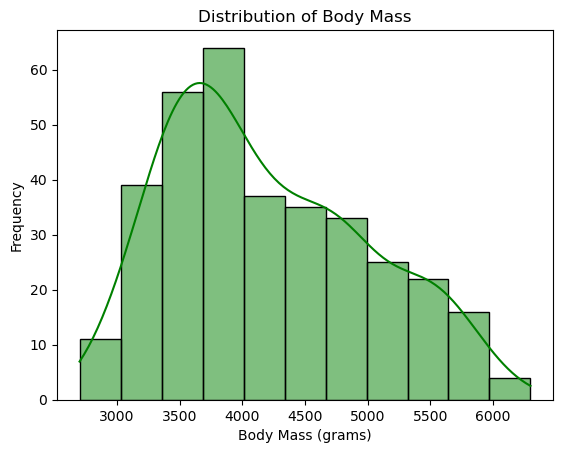

In [11]:
sns.histplot(data=penguins, x="body_mass_g",kde=True, color="green") 
plt.title("Distribution of Body Mass")
plt.xlabel("Body Mass (grams)")
plt.ylabel("Frequency")

## Task 3

### Penguins Probabability Distribution

> For each of the variables in the penguin data set, suggest what probability distribution from the numpy random distribution list is the most appropriate to model the variable.

> https://numpy.org/doc/stable/reference/random/generator.html#distributions

The variables are as listed above 

## Task 4

### Coin Flip

## Task 5

### Seaborn plots for penguins

*** 
# End